<a href="https://www.kaggle.com/code/aayushsin7a/scania-aps-failure-prediction?scriptVersionId=151175157" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import the Required Libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Import the required libraries 
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from imblearn.over_sampling import SMOTE
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform,randint
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from prettytable import PrettyTable
import pickle

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_training_set.csv
/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_test_set_processed_8bit.csv
/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_training_set_processed_8bit.csv
/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_description.txt
/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_test_set.csv


In [2]:
df = pd.read_csv("/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_training_set.csv")

In [3]:
df.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
print("The total number of train datapoints are :",df.shape[0])
print("The total number of features: ",df.shape[1])
print("Features list,\n",list(df.columns))


The total number of train datapoints are : 60000
The total number of features:  171
Features list,
 ['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'c

# Data pre-processing
- Class label pre-processing 

In [5]:
def get_correct_label(y):
    """
    This functions converts
    the class labels from 
    'neg' & 'pos' to 0 and 1 respectively
    """
    return y.replace(['neg','pos'],[0,1])

print(df['class'].unique())
df['class'] = get_correct_label(df['class'])
print(df['class'].unique())

['neg' 'pos']
[0 1]


In [6]:
df['class'].value_counts()

class
0    59000
1     1000
Name: count, dtype: int64

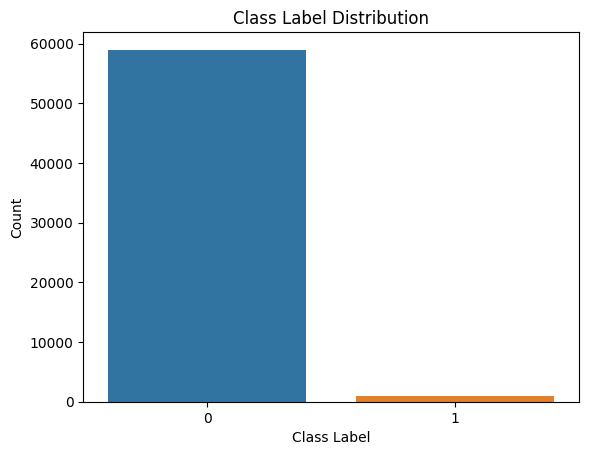

In [7]:
# Count the occurrences of each class label
class_counts = df['class'].value_counts()

# Create a bar plot with x as class labels and y as their counts
sns.barplot(x=class_counts.index, y=class_counts.values)

plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

> Observation:

This dataset is highly imbalanced as the number of negative class points are much much more than the positive class points. We can choose to upsample the minority class datapoints, or use a modified classifier to tackle this problem.

> Checking for single value features


Out of the available features, the ones that have the same value for all datapoints do not hold much importance in improving performance of our model. Hence, we can discard those features.

We can remove the features that have standard deviation = 0

In [8]:
import pandas as pd

def drop_zero_std_dev_columns(df):
    """
    Drop columns from the DataFrame that have zero standard deviations.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - Modified DataFrame with zero std dev columns removed.
    - List of dropped columns.
    """
    # Replace non-numeric values with NaN
    df = df.apply(pd.to_numeric, errors='coerce')

    # Calculate standard deviations
    std_devs = df.std()

    # Identify columns with zero standard deviations
    zero_std_dev_columns = std_devs[std_devs == 0].index

    # Drop columns with zero standard deviations
    dropped_columns = list(zero_std_dev_columns)
    df.drop(zero_std_dev_columns, axis=1, inplace=True)

    return df, dropped_columns


In [9]:
# Call the function
df, dropped_columns = drop_zero_std_dev_columns(df)

# Print the modified DataFrame
print("Modified DataFrame:")
print(df)

# Print the dropped columns
print("\nDropped Columns:")
print(dropped_columns)


Modified DataFrame:
       class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0          0   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1          0   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2          0   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3          0      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4          0   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0   
...      ...     ...     ...           ...     ...     ...     ...     ...   
59995      0  153002     NaN  6.640000e+02   186.0     0.0     0.0     0.0   
59996      0    2286     NaN  2.130707e+09   224.0     0.0     0.0     0.0   
59997      0     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998      0   80292     NaN  2.130706e+09   494.0     0.0     0.0     0.0   
59999      0   40222     NaN  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    ee

> Missing Values

Our dataset is known to have a high number of missing values. Lets have a closer look into it

In [10]:
# Creating a dictionary whose keys are the column names and values are the percentage of missing values
nan_count = {k:list(df.isna().sum()*100/df.shape[0])[i] for i,k in enumerate(df.columns)}

# Sorting the dictionary in descending order based on the percentage of missing values
nan_count = {k: v for k, v in sorted(nan_count.items(), key=lambda item: item[1],reverse=True)}

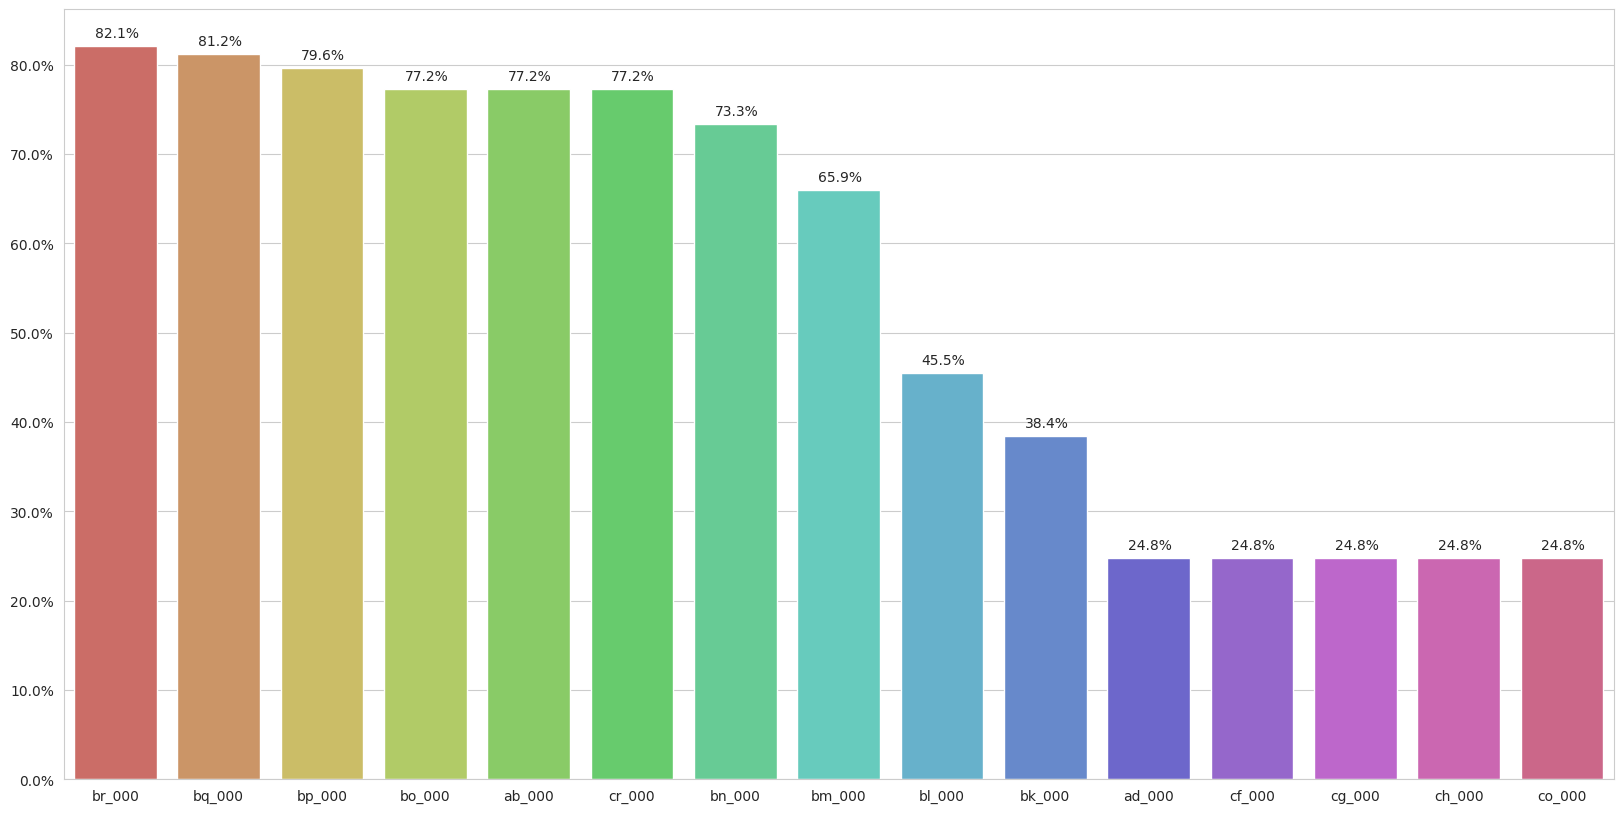

In [11]:
# Plotting a graph showing the top 15 features having highest percentage of missing values 
sns.set_style(style="whitegrid")
plt.figure(figsize=(20,10))

# Bar Plot
plot = sns.barplot(x= list(nan_count.keys())[:15],y = list(nan_count.values())[:15],palette="hls")

# Add annotations above each bar signifying their value
for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Make y-axis more interpretable
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.show()

It is very evident that the some features have more than 50% missing values out of the total 60,000 datapoints.

- The dataset consists of 171 features, including the class label. Also, in the class label attribute, we will replace ‘neg’ with 0 and ‘pos’ with 1.

- The class distribution graph shows a serious case of data imbalance, since out of the total 60,000 training points, about 59,000 points belong to the negative class and just 1,000 points belong to the positive class.

- We can choose to up-sample the minority class data points, or use a modified classifier to tackle this problem. Also, the percentage of missing data is significantly high in some features (As high as 82% in a feature).

> Removing Single Valued Features

- Out of the available features, the ones that have the same value for all data points do not hold much importance in improving performance of our model. Hence, we can discard those features. We can remove the features that have standard deviation = 0.

- One of the features, (‘cd_000') is seen to have a constant value for all data points. We may remove this feature.

> Handling Missing Values

It is always a good practice to identify and replace missing values for each column in your input data prior to modeling your prediction task. This is called missing data imputation, or imputing for short.

We can perform some basic handling of missing data in the following manner:

- We will discard features with more than 70% missing values.
- For features with missing values less than 5%, we can drop those rows.
- For features with missing values between 5–15%, we will impute those missing values using mean/median.
- Now for the rest of the features with missing value% between 15–70% missing values, use model based imputation technique.


# Handling Missing Data
> Dropping features and rows

In [12]:
def remove_na(df,nan_feat):
    """
    This function removes features 
    having more than 70 % missing data,
    
    and remove rows that have NA values
    from features that have less than 5 %
    missing values 
    
    """
    # Removing features having more than 70 % NA
    df = df.dropna(axis=1,thresh=18000)
    # 70 % of 60,000 = 42,000
    
    # Removing rows having NA from above created list of features
    df.dropna(subset=nan_feat)
    
    # Reset Index 
    df = df.reset_index(drop=True)
    return df
print("Shape of dataframe",df.shape)

# List of features having less than 5 % of NA
na_5 = [k for k, v in nan_count.items() if v < 5]
df = remove_na(df,na_5)
print("Shape after removal of rows and columns:",df.shape)
print("Number of features having missing values below 5%:",len(na_5))

Shape of dataframe (60000, 170)
Shape after removal of rows and columns: (60000, 163)
Number of features having missing values below 5%: 128


# Feature Removed 


In [13]:
# creating a list of the top 7 features having highest number of missing values
na_70 = list(nan_count.keys())[:7]

In [14]:
# Total removed features
removed_features = na_70 + dropped_columns
print("Removed features are:", removed_features)

Removed features are: ['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000', 'cd_000']


In [15]:
# Seperating Attribute and class label 
y_train = df['class']
x_train = df.drop('class',axis=1)

> Imputation of missing values 

- Model based Imputations, 
- Multivariate Imputations by Chained Equations

Ref:https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

For features having 15 - 70 % missing values, we will perform iterative based imputation technique called 'MICE'. At each step, a feature with missing value is designated as output y and the other feature columns are treated as input x. 

- A regressor (Ridge) in our case is fit on (X,y) for known y. 
- This is done for each feature in an iterative fashion, and then is repeated for max_iter (10 as default) imputation rounds. The results of the final imputation round are returned.

In [16]:
def imputation(df,mis_col):
    """
    This function implies Missing values
    using Median or given features,and 
    Model based Imputations on the rest
    """
    
    # Using Sklearn's simple imputer
    median_imputer = SimpleImputer(missing_values=np.NaN,strategy='median')
    
    # Creating new dataframe of imputed values 
    df_median = median_imputer.fit_transform(df[mis_col])
    df1 = df.copy()
    df1[mis_col] = df_median